Compare the interpolation errors (convergence plots) of polynomial interpolation and spline interplation with classical cubic splines for the functions

- $f(x) = \sqrt{x}$ on $[0,1]$
- $f(x) = arctan(10x)$ on $[−1,1]$

You  can  start  from  the  notebook splines.ipynb using  the  interpolate  module  from scipy.  Try to find good knot distributions.

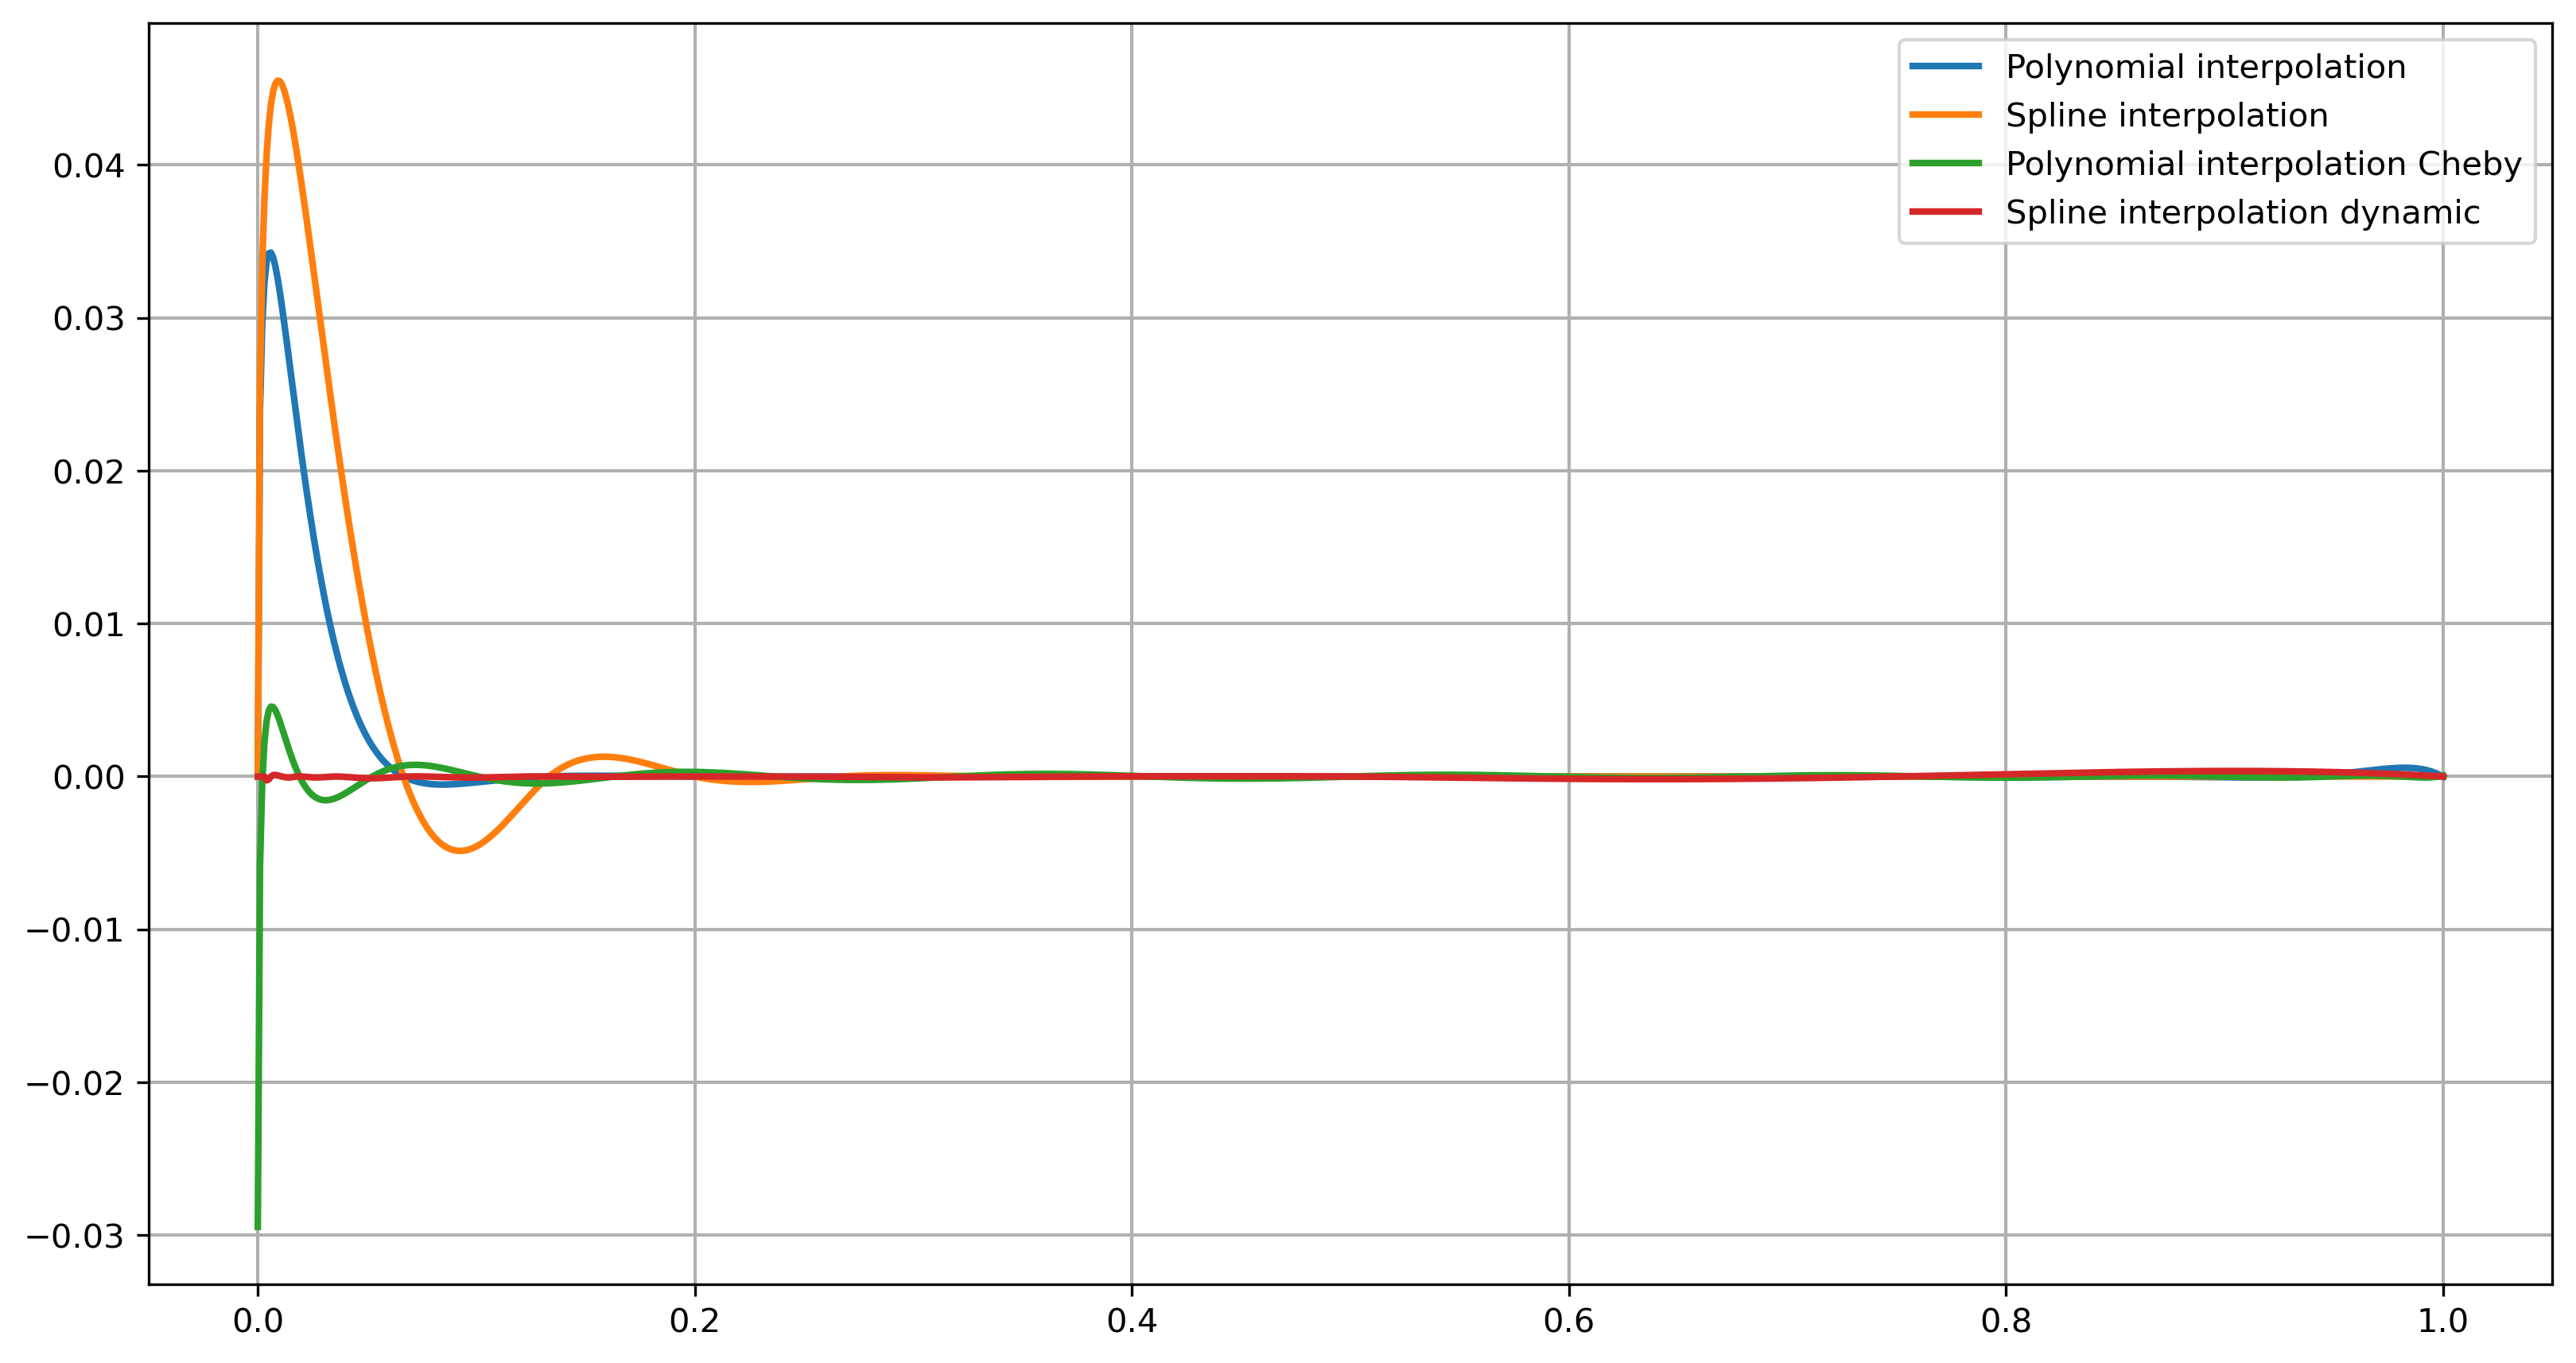

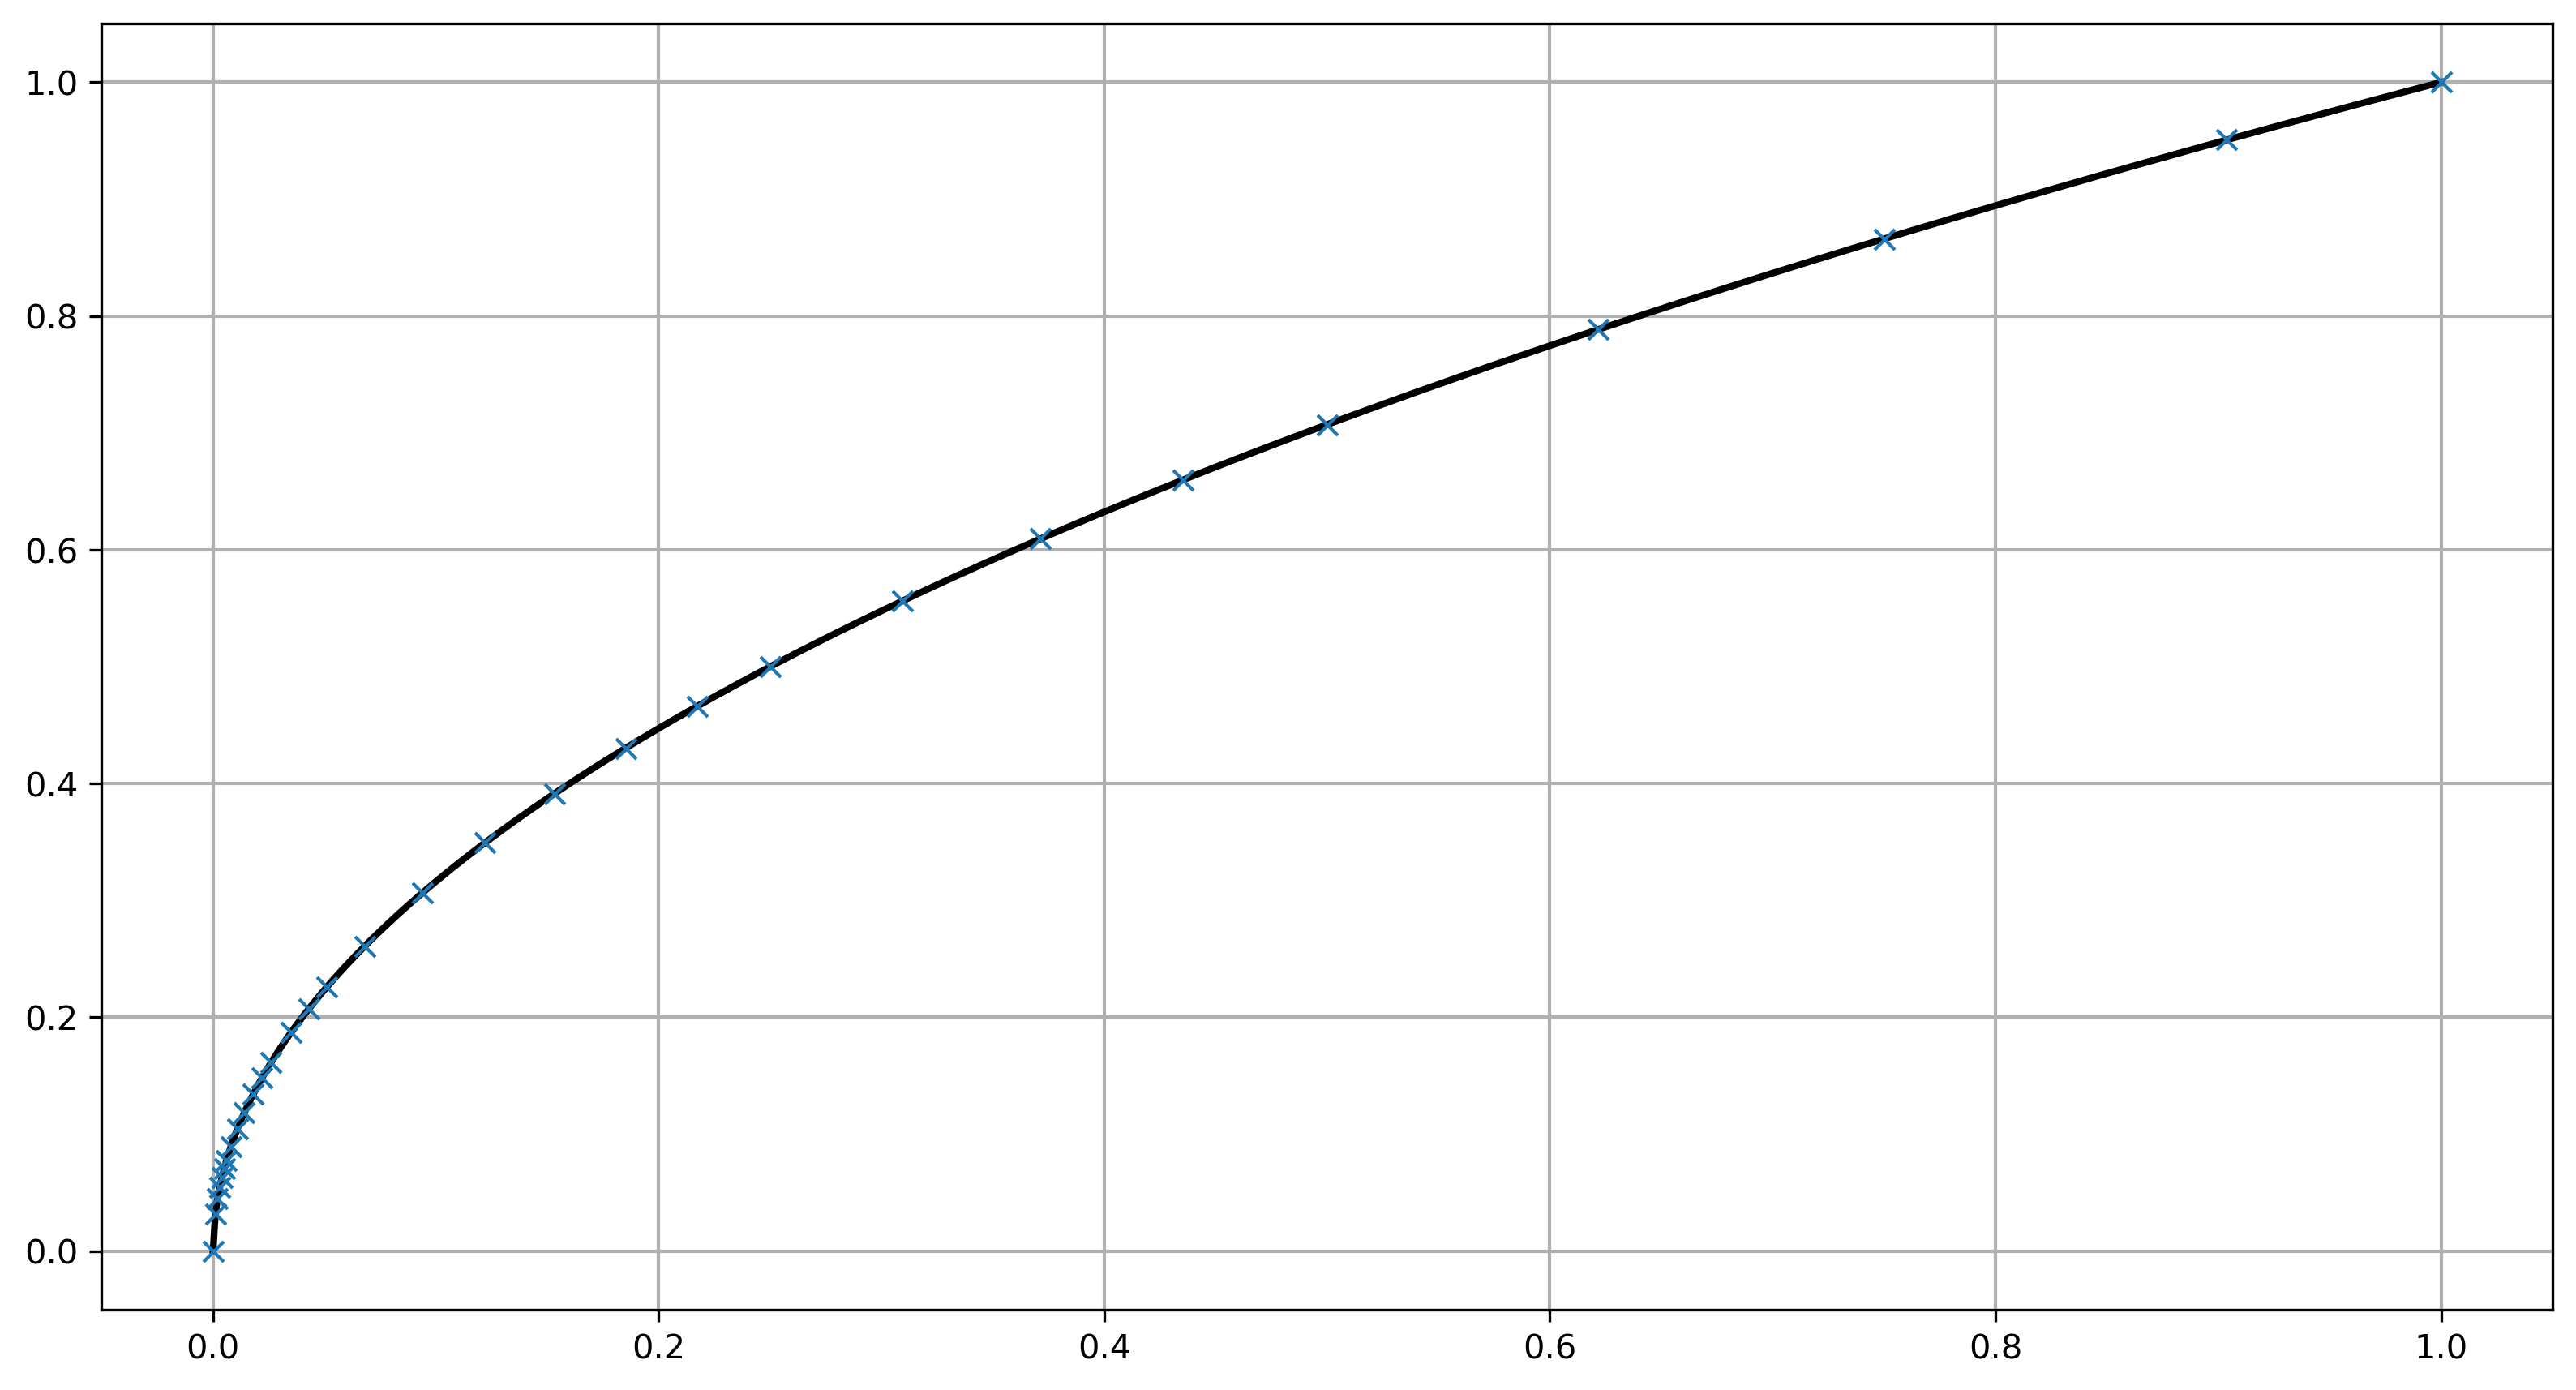

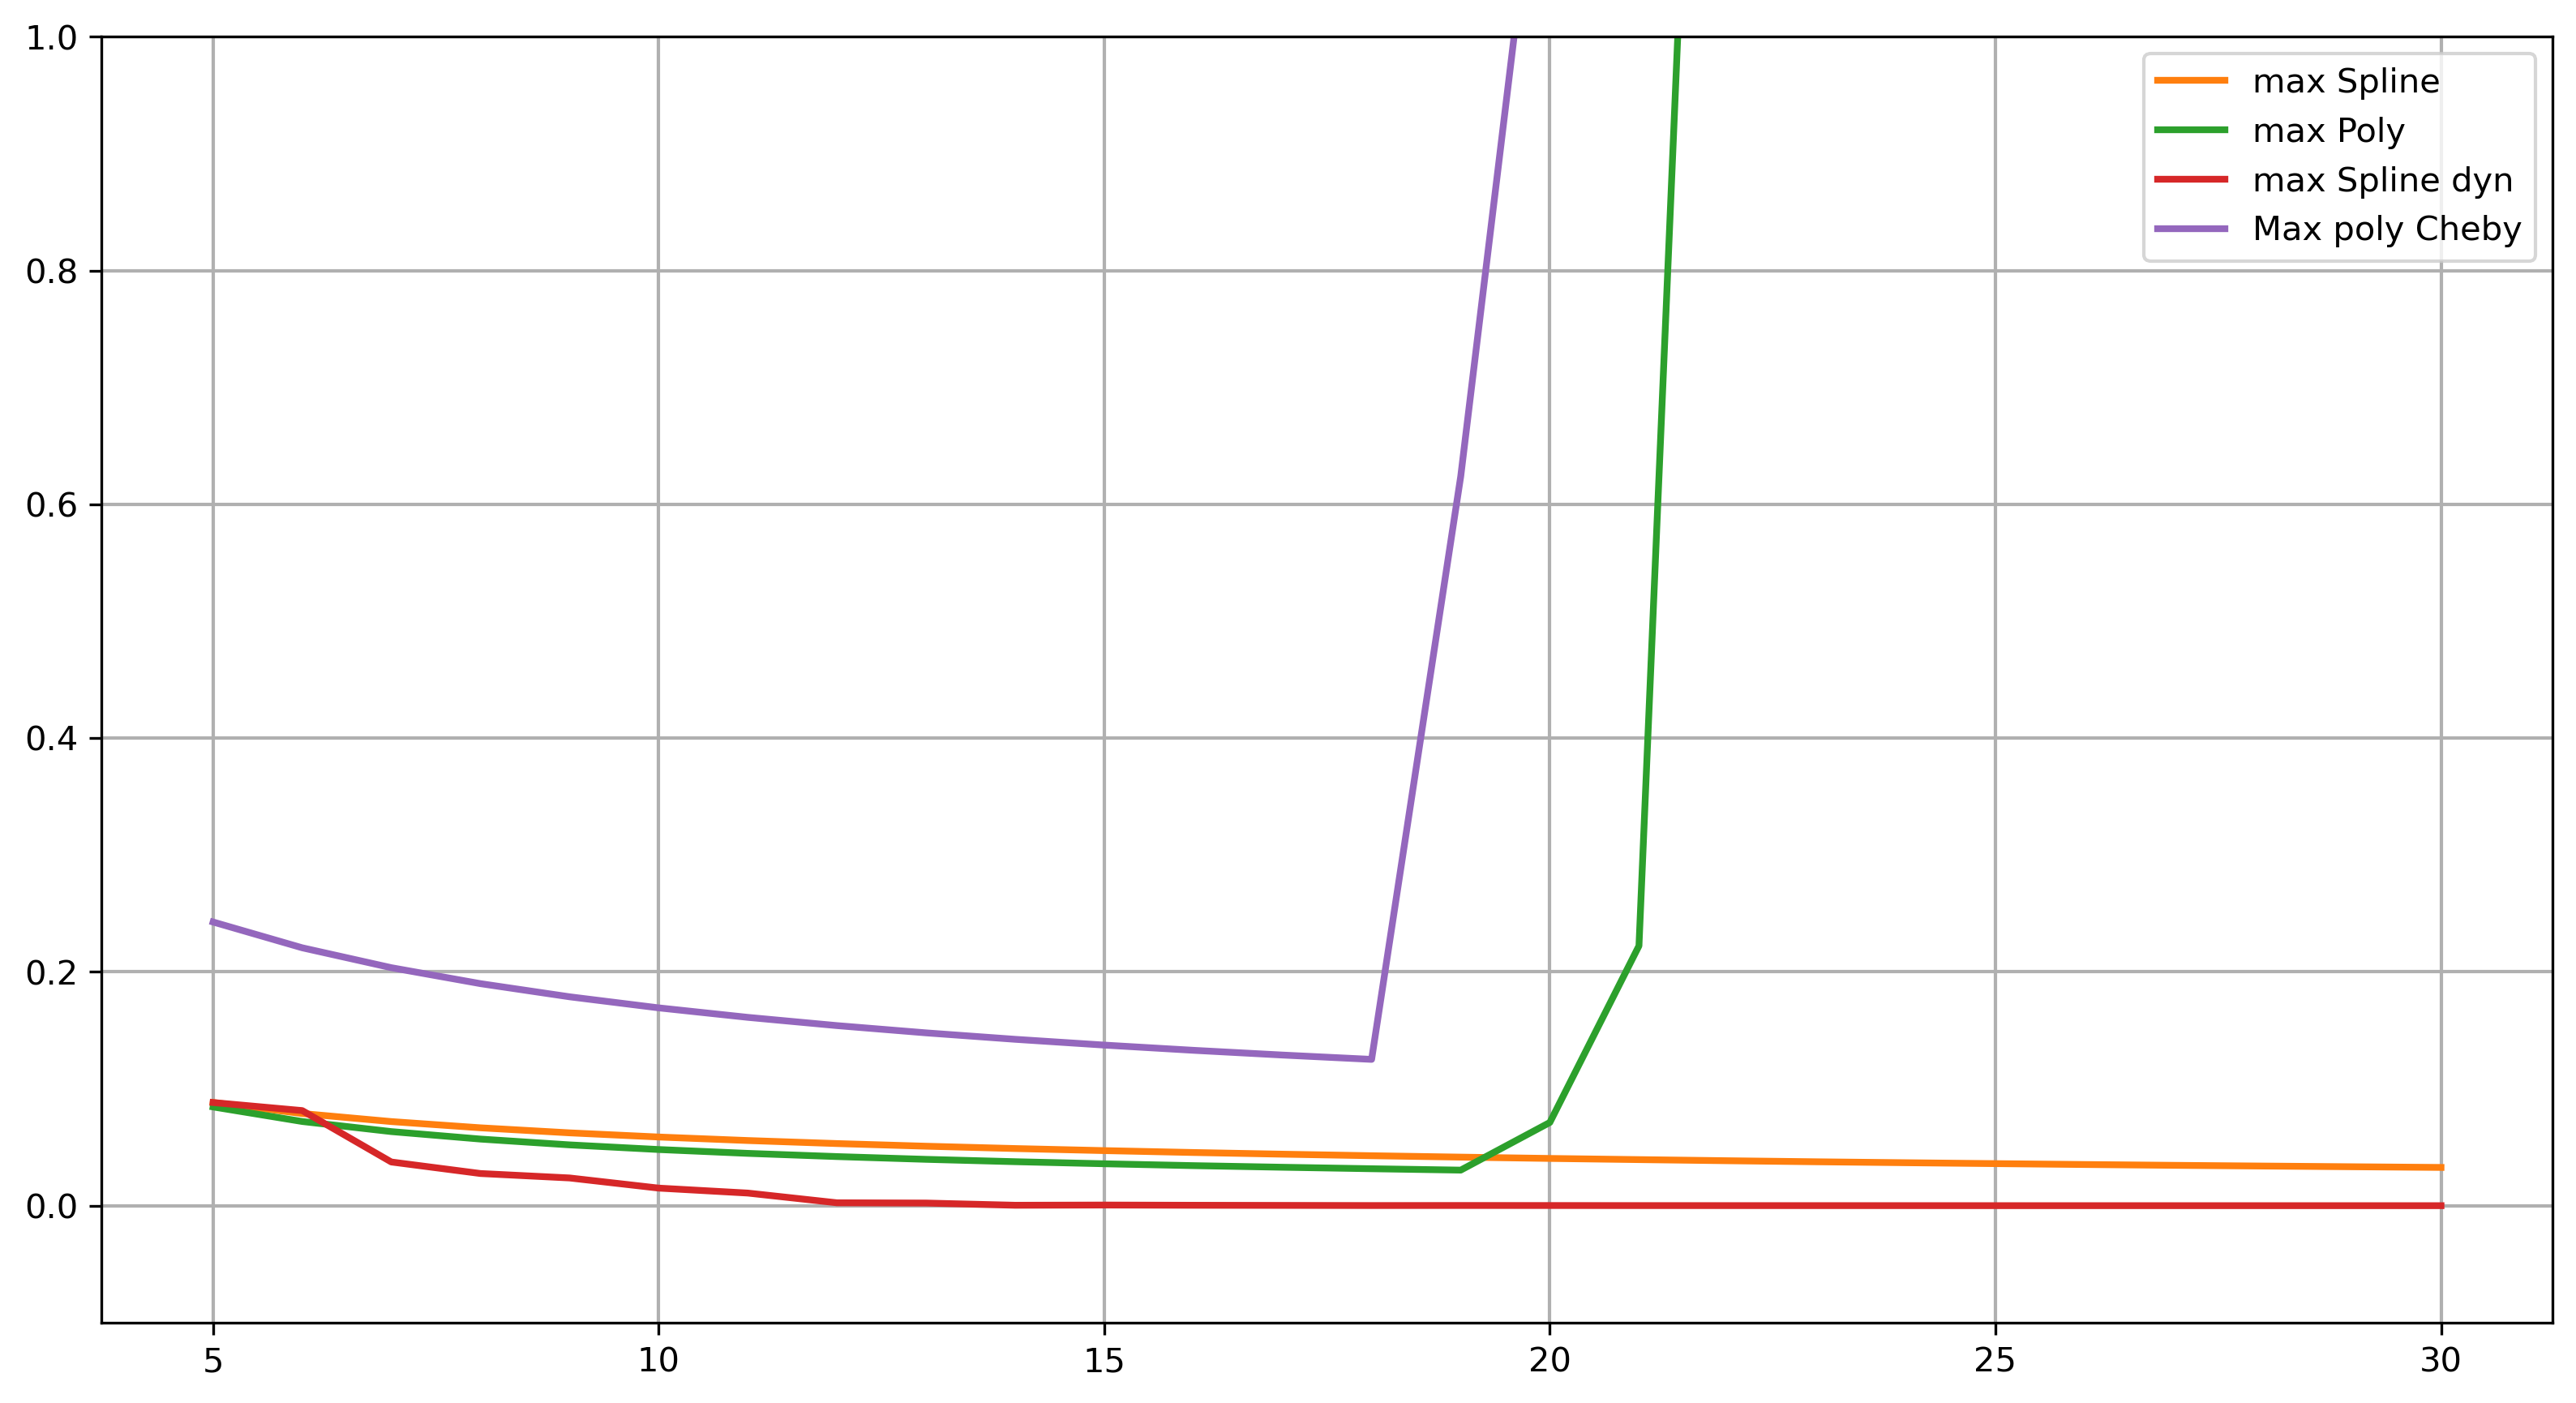

In [95]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['grid.linewidth'] = 1.0

n_max = 30
n_list = list(range(5, n_max+1))

max_error_spline = []
max_error_spline_dyn = []
max_error_poly = []
max_error_poly_cheby = []
max_error_poly_dyn = []

x = np.linspace(0,1,1000)
true_vals = np.sqrt(x)

dynamic_pts = np.array([0, 0.25, 0.5, 0.75, 1])

for n in n_list:
    linear_pts = np.linspace(0, 1, n, endpoint=True)
    linear_vals = np.sqrt(linear_pts)
    
    dynamic_pts_vals = np.sqrt(dynamic_pts)
    
    i = np.arange(n+1)
    cheby_pts = np.cos(np.pi * (2*i+1)/(2*n+2)) /2 +0.5
    cheby_vals = np.sqrt(cheby_pts)
    
    
    tck = interpolate.splrep(linear_pts, linear_vals)
    spline_inter = interpolate.splev(x, tck)
    
    max_error_spline.append(np.amax(np.abs(true_vals - spline_inter)))   
    
    
    tck = interpolate.splrep(dynamic_pts, dynamic_pts_vals)
    spline_dynamic_inter = interpolate.splev(x, tck)
    
    max_error_spline_dyn.append(np.amax(np.abs(true_vals - spline_dynamic_inter)))   
    
    # --- poly----
    poly = interpolate.lagrange(linear_pts, linear_vals)
    poly_inter = poly(x)
    
    max_error_poly.append(np.amax(np.abs(true_vals - poly_inter)))
    
    # poly cheby
    poly = interpolate.lagrange(cheby_pts, cheby_vals)
    poly_cheby_inter = poly(x)
    
    max_error_poly_cheby.append(np.amax(np.abs(true_vals - poly_cheby_inter)))
    
    
    poly = interpolate.lagrange(dynamic_pts, dynamic_pts_vals)
    poly_dyn_inter = poly(x)
    
    max_error_poly_dyn.append(np.amax(np.abs(true_vals - poly_dyn_inter)))
    
    max_error_idx = np.argmax(np.abs(true_vals - spline_dynamic_inter))
    dynamic_pts = np.append(dynamic_pts, x[max_error_idx])
    dynamic_pts = np.sort(dynamic_pts)
    
    if n == 16:
        plt.figure(figsize = (13, 7))
        plt.plot(x, true_vals - poly_inter, label="Polynomial interpolation")
        plt.plot(x, true_vals - spline_inter, label="Spline interpolation")
        plt.plot(x, true_vals - poly_cheby_inter, label="Polynomial interpolation Cheby")
        plt.plot(x, true_vals - spline_dynamic_inter, label="Spline interpolation dynamic")
        plt.grid()
        plt.legend()


plt.figure(figsize = (13, 7))
plt.plot(x, true_vals, 'k')
plt.plot(dynamic_pts, np.sqrt(dynamic_pts), 'x')
plt.grid()

        
plt.figure(figsize = (13, 7))
plt.plot(n_list, max_error_spline, 'C1', label="max Spline")
plt.plot(n_list, max_error_poly, 'C2', label="max Poly")
plt.plot(n_list, max_error_spline_dyn, 'C3', label="max Spline dyn")


plt.plot(n_list, max_error_poly_chevy, 'C4', label="Max poly Cheby")
plt.ylim([-0.1, 1])
plt.legend()
plt.grid()

[9.99358254e-01 9.94234162e-01 9.84038559e-01 9.68876066e-01
 9.48902270e-01 9.24322129e-01 8.95387868e-01 8.62396394e-01
 8.25686241e-01 7.85634108e-01 7.42650981e-01 6.97177928e-01
 6.49681561e-01 6.00649260e-01 5.50584161e-01 5.00000000e-01
 4.49415839e-01 3.99350740e-01 3.50318439e-01 3.02822072e-01
 2.57349019e-01 2.14365892e-01 1.74313759e-01 1.37603606e-01
 1.04612132e-01 7.56778713e-02 5.10977302e-02 3.11239339e-02
 1.59614406e-02 5.76583784e-03 6.41746414e-04 0.00000000e+00]


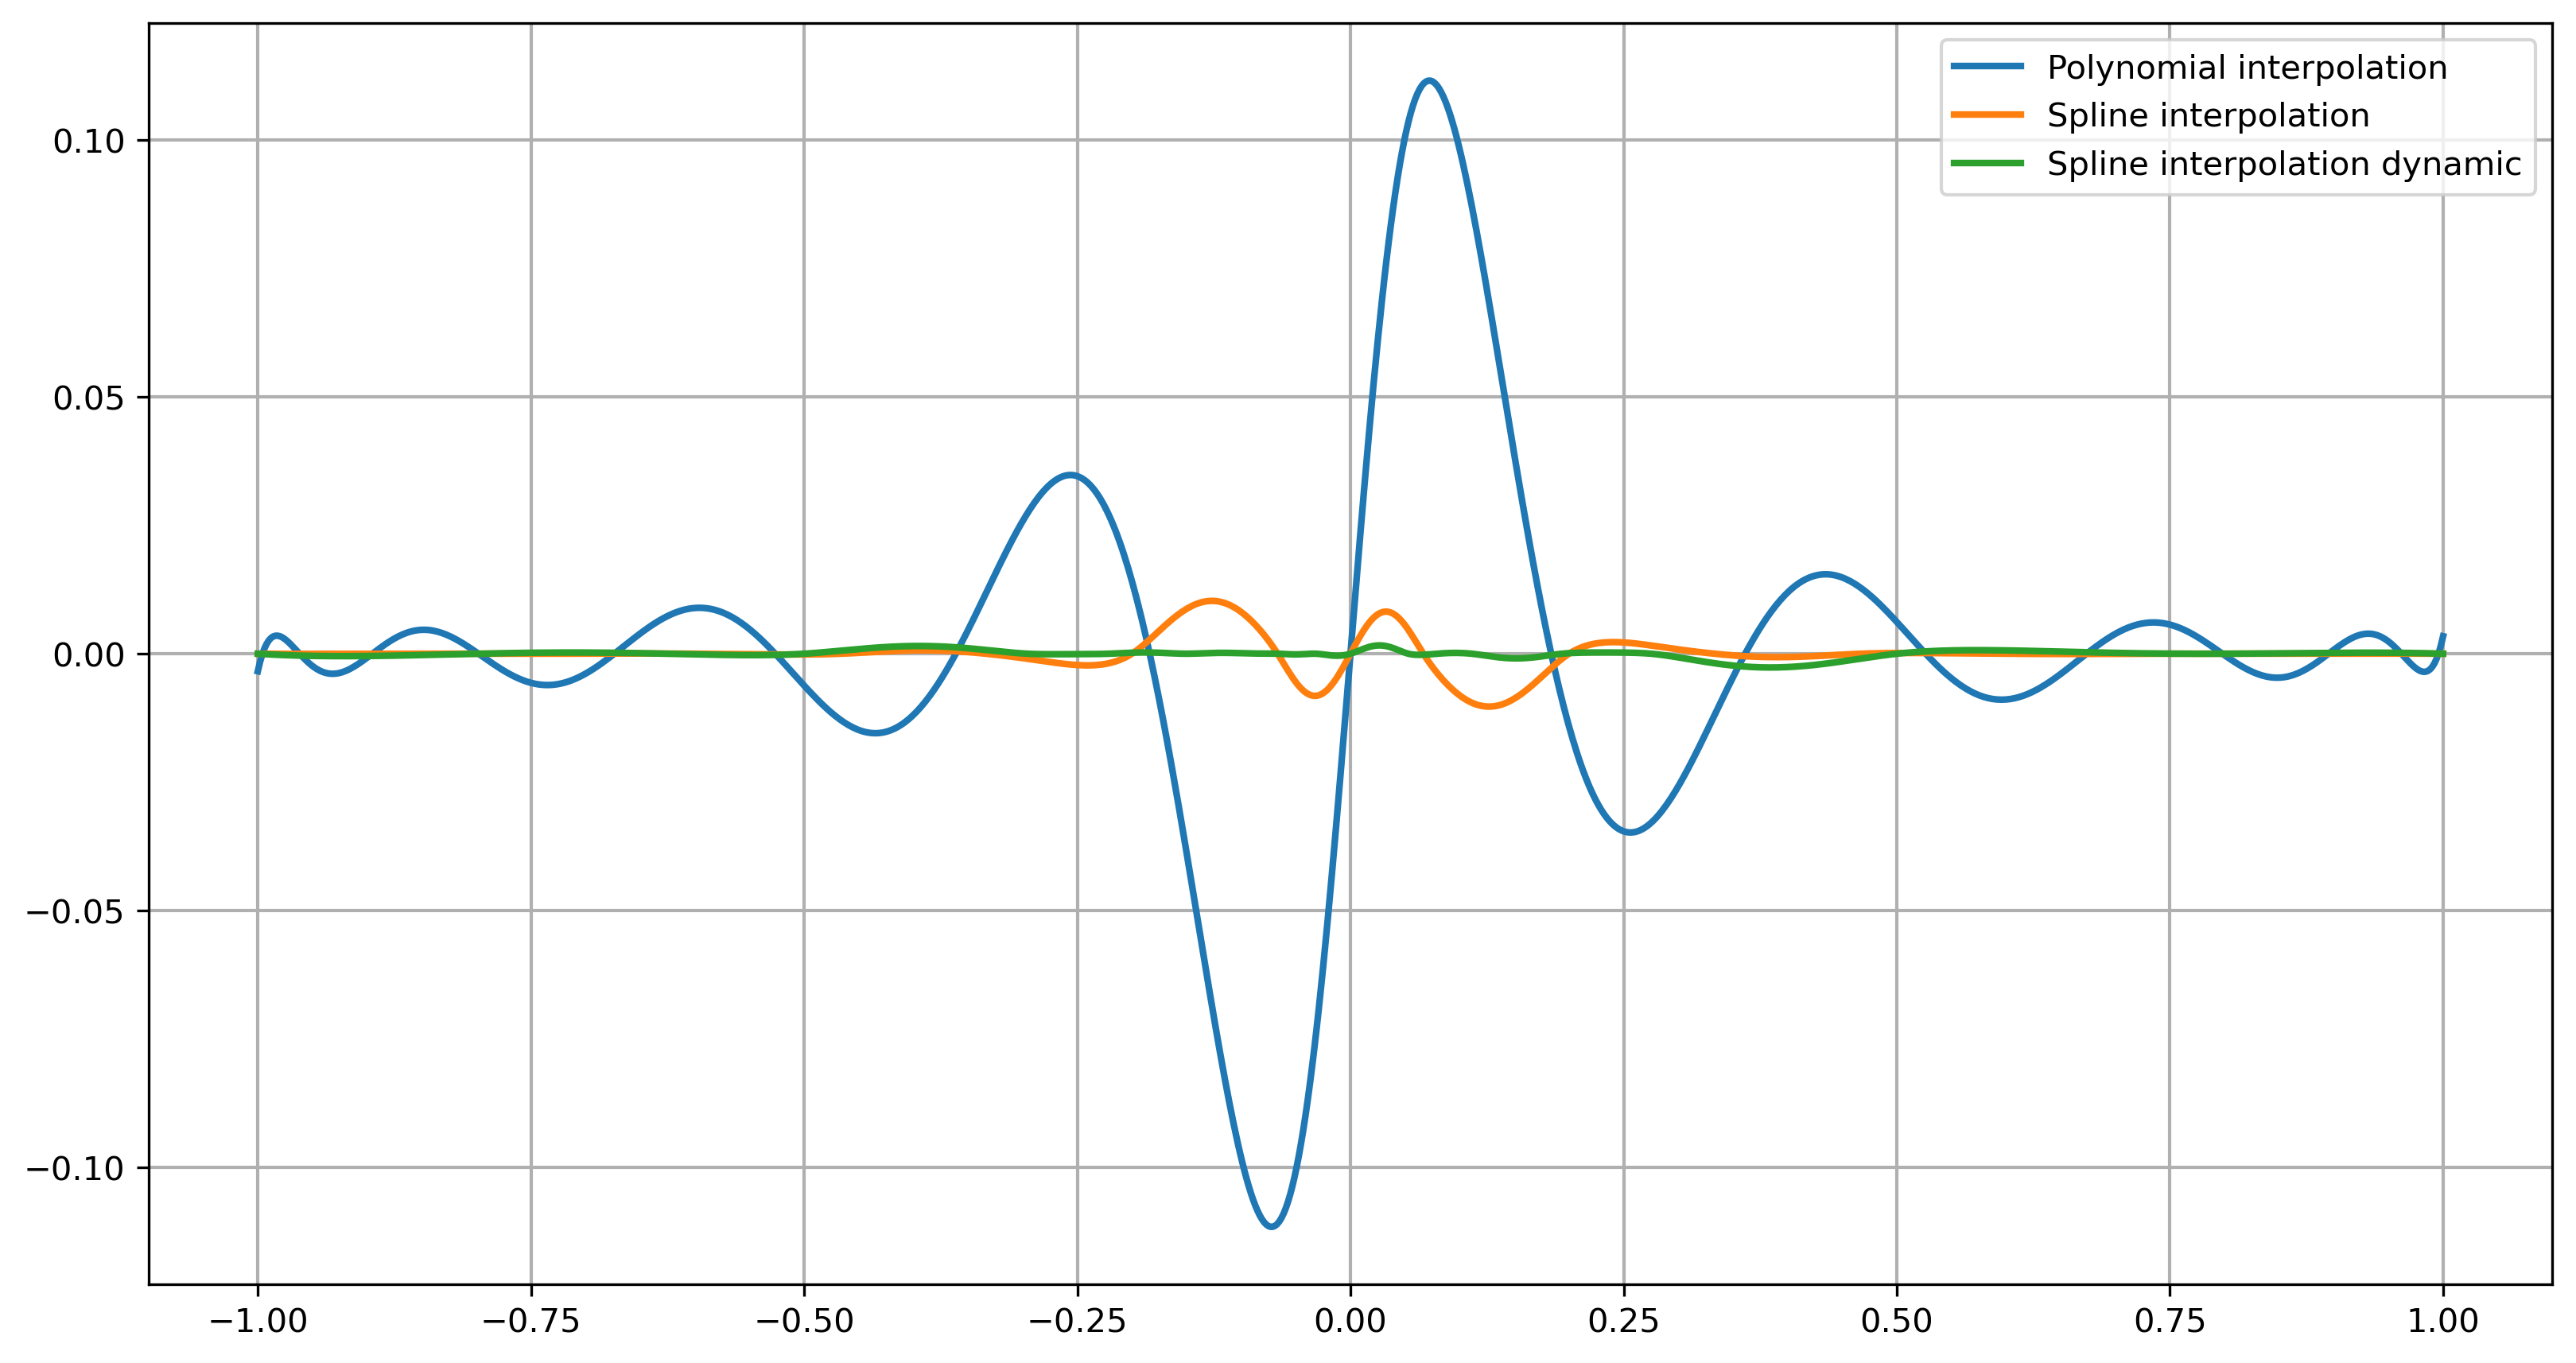

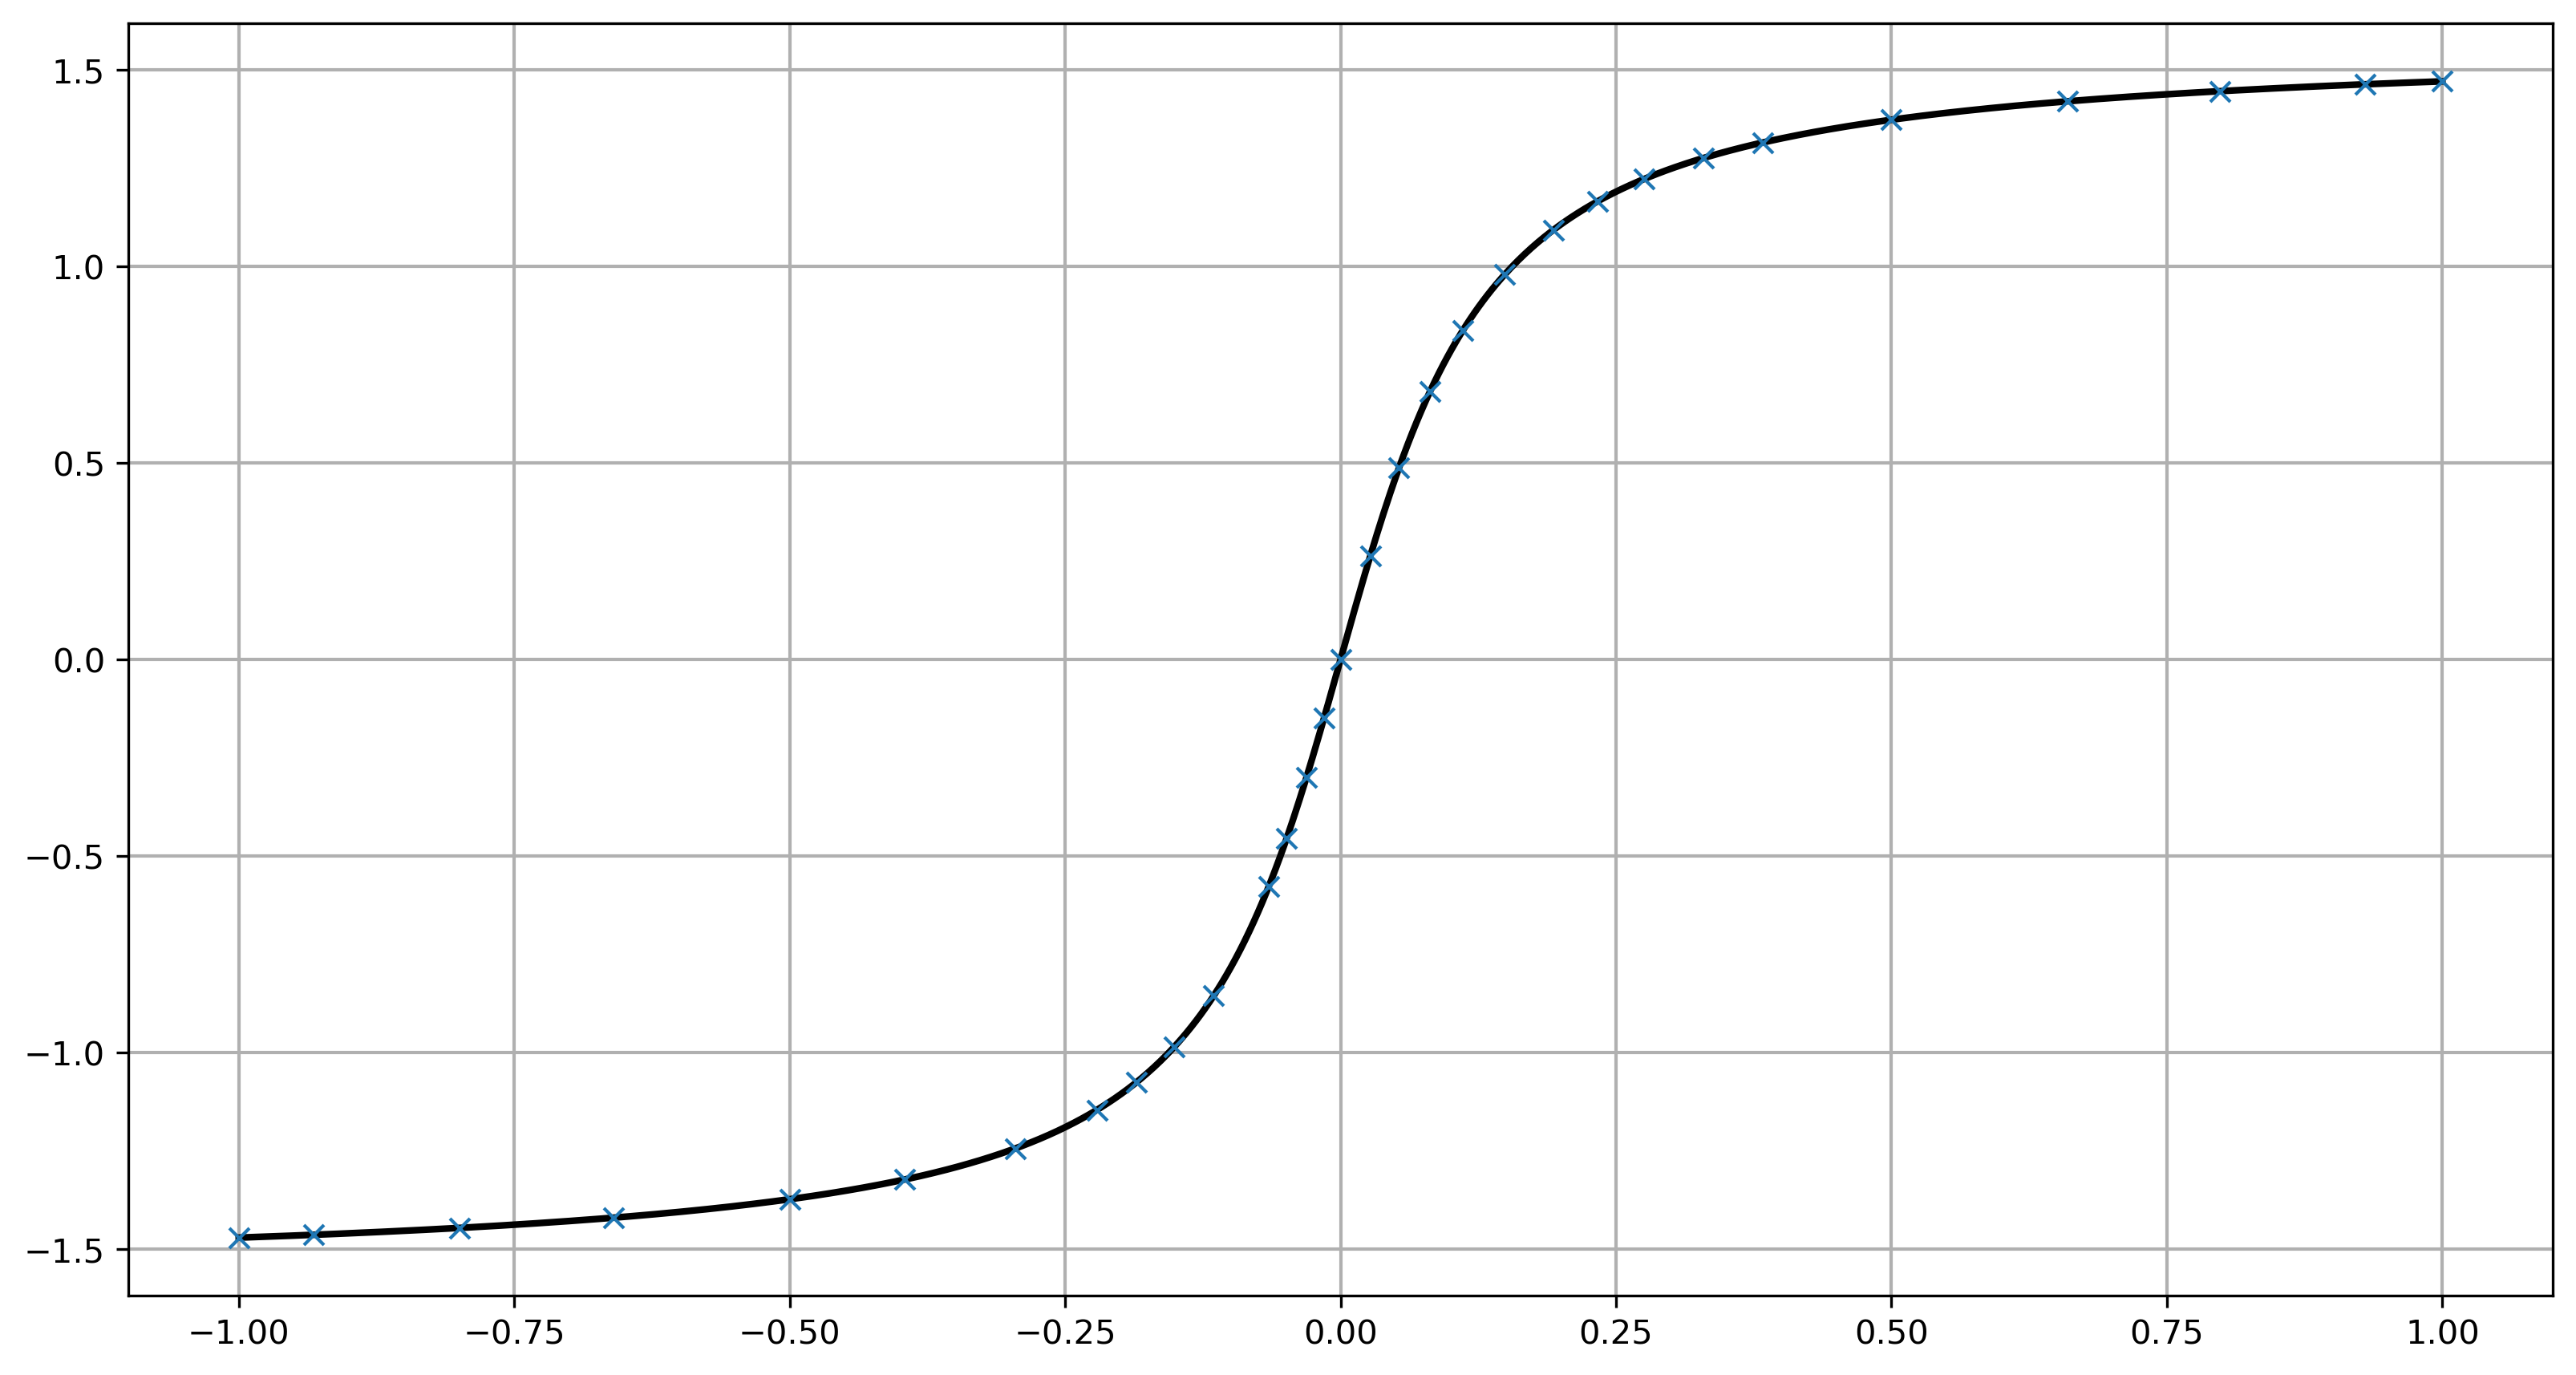

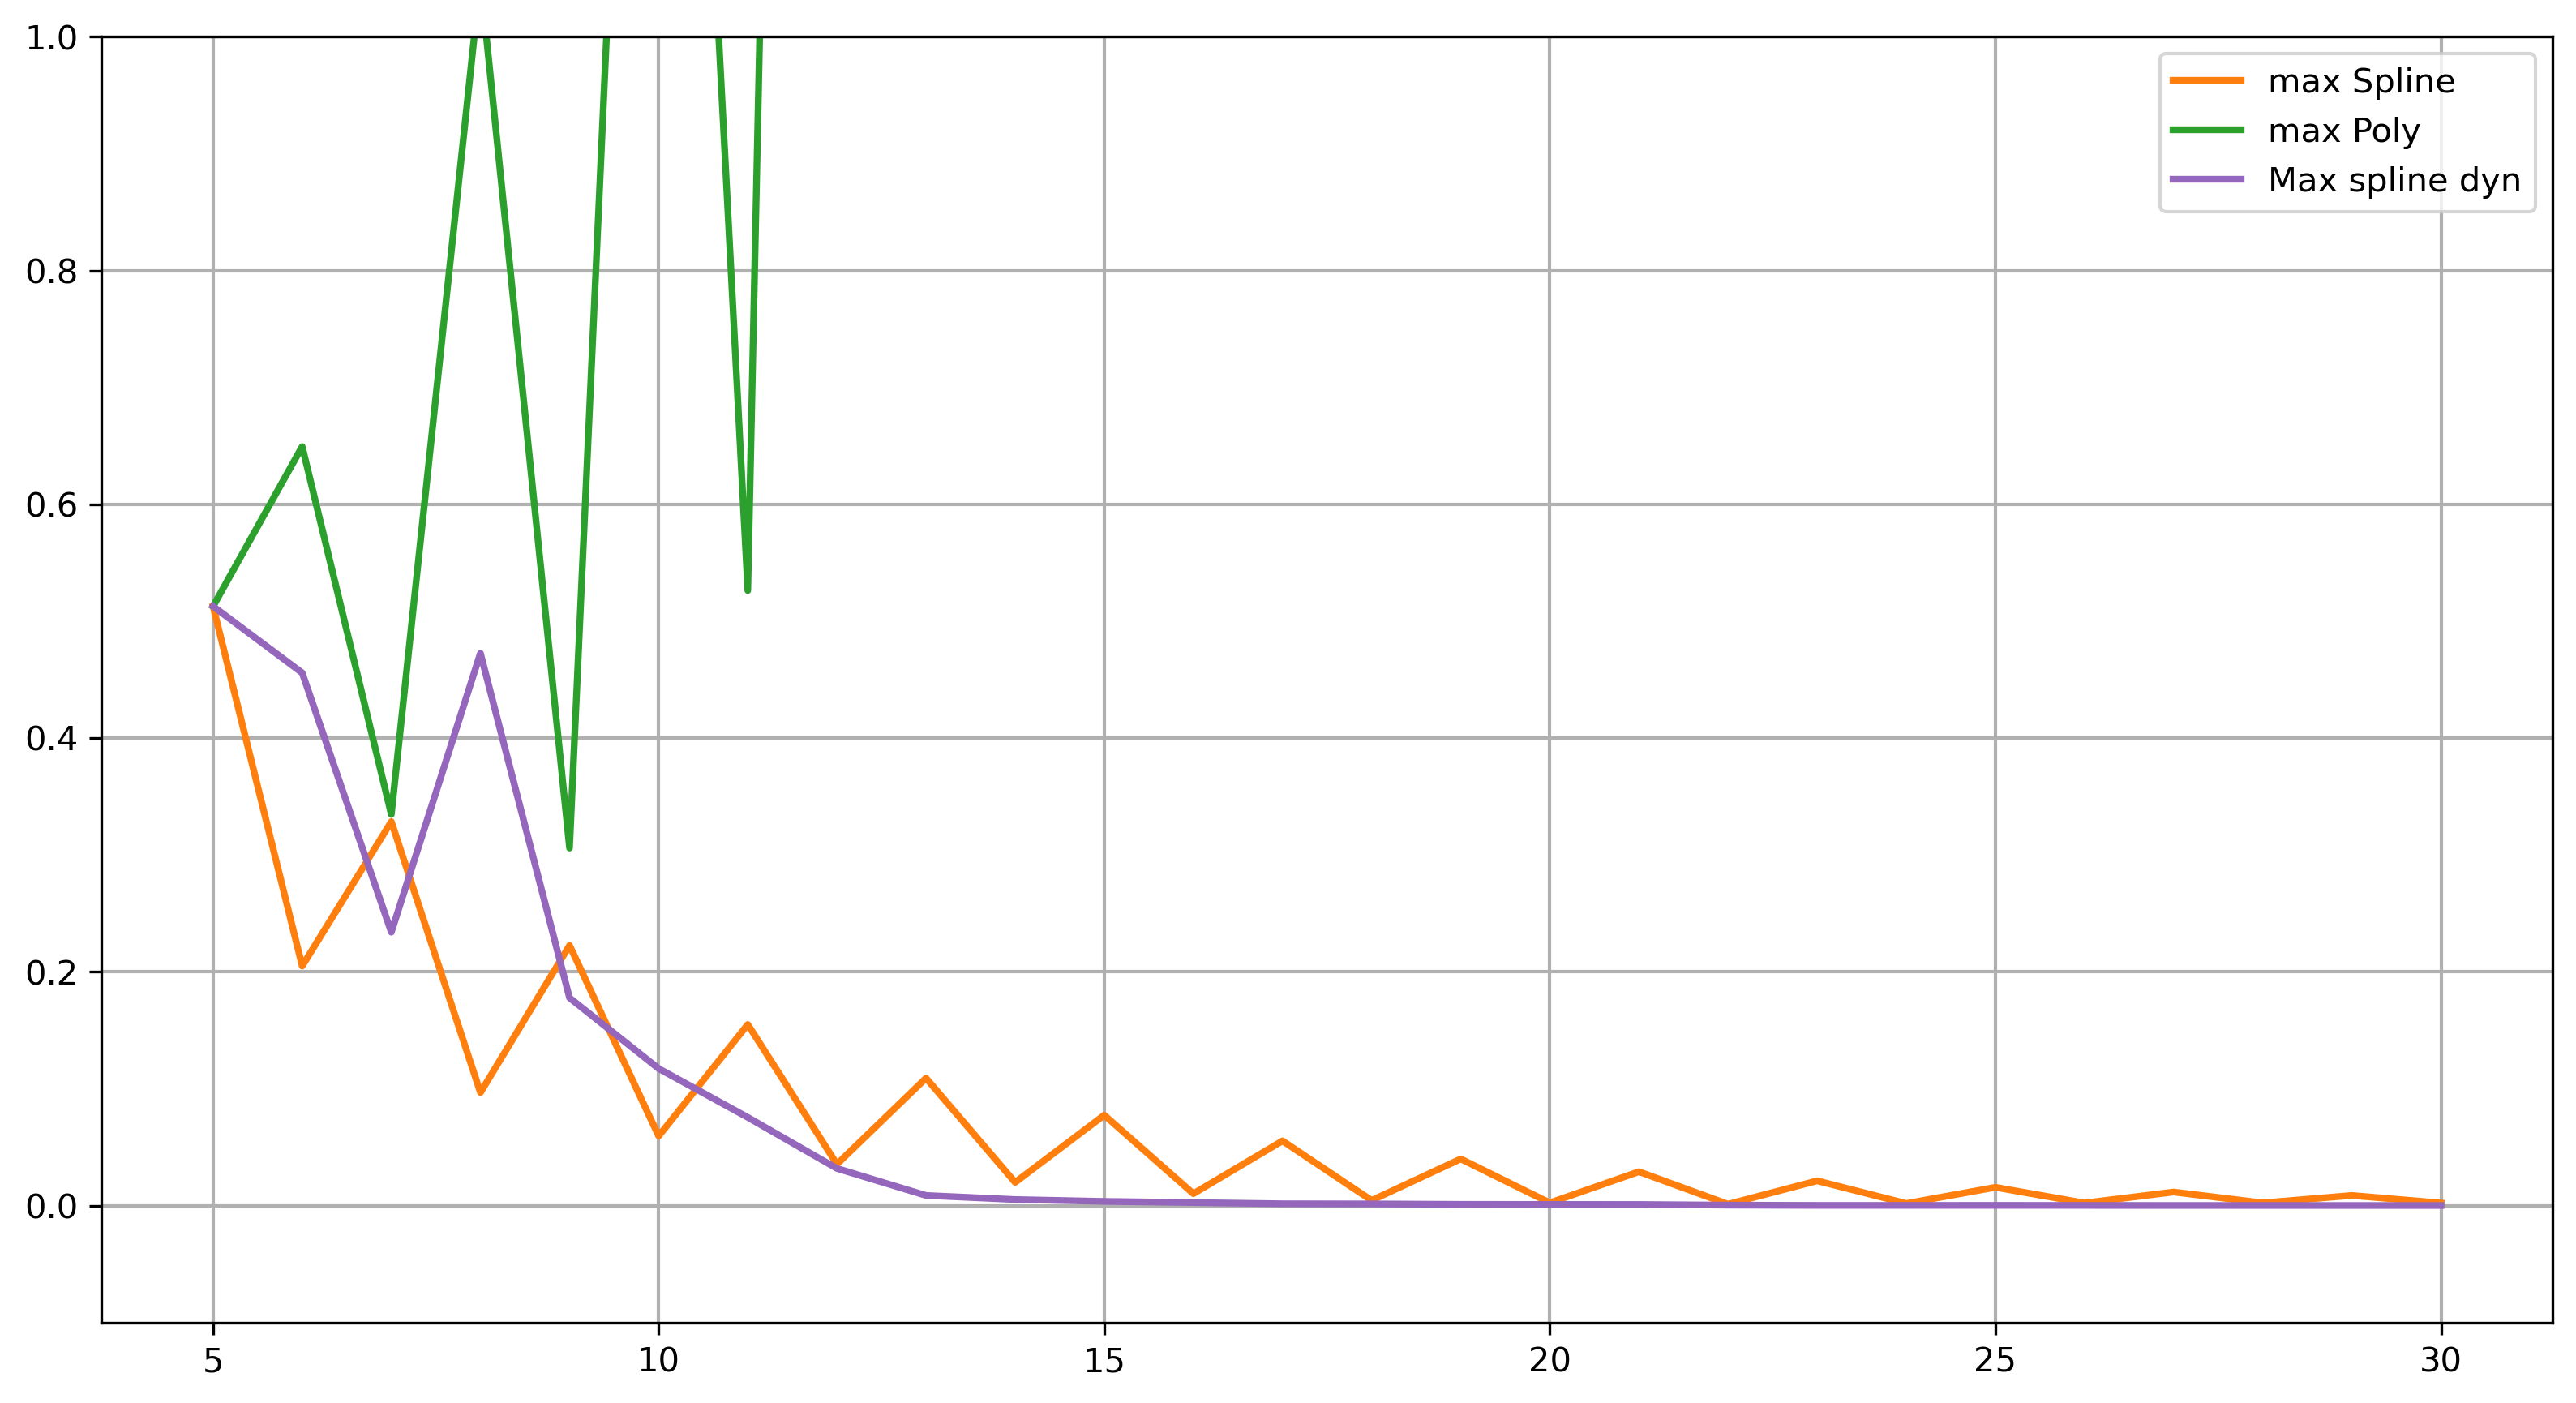

In [102]:
max_error_spline = []
max_error_poly = []
max_error_poly_cheby = []
max_error_spline_dyn = []
rmse_spline = []
rmse_poly = []
rmse_poly_cheby = []


def fun(x):
    return np.arctan(10*x)


x = np.linspace(-1,1,1000)
true_vals = fun(x)


dynamic_pts = np.linspace(-1, 1, 5, endpoint=True)

for n in n_list:
    linear_pts = np.linspace(-1, 1, n, endpoint=True)
    linear_vals = fun(linear_pts)
    
    i = np.arange(n+1)
    cheby_pts = np.cos(np.pi * (2*i+1)/(2*n+2))
    cheby_vals = fun(cheby_pts)
    
    dynamic_pts_vals = fun(dynamic_pts)
    
    tck = interpolate.splrep(linear_pts, linear_vals)
    spline_inter = interpolate.splev(x, tck)
    
    max_error_spline.append(np.amax(np.abs(true_vals - spline_inter)))
    rmse_spline.append(np.sqrt(np.sum((true_vals - spline_inter)**2)))
    
    tck = interpolate.splrep(dynamic_pts, dynamic_pts_vals)
    spline_dynamic_inter = interpolate.splev(x, tck)
    
    max_error_spline_dyn.append(np.amax(np.abs(true_vals - spline_dynamic_inter)))   
    # --- poly----
    poly = interpolate.lagrange(linear_pts, linear_vals)
    poly_inter = poly(x)
    
    max_error_poly.append(np.amax(np.abs(true_vals - poly_inter)))
    rmse_poly.append(np.sqrt(np.sum((true_vals - poly_inter)**2)))
    
    # poly cheby
    poly = interpolate.lagrange(cheby_pts, cheby_vals)
    poly_inter = poly(x)
    
    max_error_poly_cheby.append(np.amax(np.abs(true_vals - poly_inter)))
    rmse_poly_cheby.append(np.sqrt(np.sum((true_vals - poly_inter)**2)))
    
    max_error_idx = np.argmax(np.abs(true_vals - spline_dynamic_inter))
    dynamic_pts = np.append(dynamic_pts, x[max_error_idx])
    dynamic_pts = np.sort(dynamic_pts)
    
    if n == 16:
        plt.figure(figsize = (13, 7))
        plt.plot(x, true_vals - poly_inter, label="Polynomial interpolation")
        plt.plot(x, true_vals - spline_inter, label="Spline interpolation")
        plt.plot(x, true_vals - spline_dynamic_inter, label="Spline interpolation dynamic")
        # plt.plot(x, true_vals - poly_cheby_inter, label="Polynomial interpolation Cheby")
        plt.grid()
        plt.legend()
        
        
plt.figure(figsize = (13, 7))
plt.plot(x, true_vals, 'k')
plt.plot(dynamic_pts, fun(dynamic_pts), 'x')
plt.grid()

    
plt.figure(figsize = (13, 7))
plt.plot(n_list, max_error_spline, 'C1', label="max Spline")
# plt.plot(n_list, rmse_spline, '--C1', label="RMSE Spline")
plt.plot(n_list, max_error_poly, 'C2', label="max Poly")

# plt.plot(n_list, rmse_poly, '--C2', label="RMSE Poly")
#plt.plot(n_list, max_error_poly_chevy, 'C3', label="Max poly Cheby")
plt.plot(n_list, max_error_spline_dyn, 'C4', label="Max spline dyn")
# plt.plot(n_list, rmse_poly_cheby, '--C3', label="RMSE Poly Cheby")
plt.ylim([-0.1, 1])
plt.legend()
plt.grid()

[-1.47112767 -1.37340077  0.          1.37340077  1.47112767]
[-0.78539816 -0.46364761  0.          0.46364761  0.78539816]
